In [1]:
%matplotlib inline
%config InlineBackend.figure_formats=["svg"]

In [2]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()
style_settings = {
    "font.sans-serif": ["Songti SC", "SimHei"],
    "axes.unicode_minus": False,
}
sns.set_style("darkgrid", style_settings)

In [3]:
# # use the desktop data
# csvfile = pathlib.Path("~/Desktop/bilibili.csv").expanduser()

# use default data
csvfile = pathlib.Path("../../data/bilibili.csv")

raw = pd.read_csv(csvfile)

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   comment           281 non-null    int64  
 1   typeid            281 non-null    int64  
 2   play              281 non-null    int64  
 3   pic               281 non-null    object 
 4   subtitle          0 non-null      float64
 5   description       279 non-null    object 
 6   copyright         281 non-null    int64  
 7   title             281 non-null    object 
 8   review            281 non-null    int64  
 9   author            281 non-null    object 
 10  mid               281 non-null    int64  
 11  created           281 non-null    int64  
 12  length            281 non-null    object 
 13  video_review      281 non-null    int64  
 14  aid               281 non-null    int64  
 15  bvid              281 non-null    object 
 16  hide_click        281 non-null    bool   
 1

In [5]:
raw.describe()

,comment,typeid,play,subtitle,copyright,review,mid,created,video_review,aid,is_pay,is_union_video,is_steins_gate,is_live_playback
count,281.000000,281.000000,2.810000e+02,0.0,281.0,281.0,281.0,2.810000e+02,281.000000,2.810000e+02,281.0,281.0,281.0,281.0
mean,3587.989324,168.017794,2.768051e+06,NaN,1.0,0.0,533459953.0,1.632178e+09,6372.619217,5.872551e+08,0.0,0.0,0.0,0.0
std,4407.248268,78.913400,1.754950e+06,NaN,0.0,0.0,0.0,8.106261e+06,8871.608323,2.255457e+08,0.0,0.0,0.0,0.0
min,172.000000,21.000000,3.336690e+05,NaN,1.0,0.0,533459953.0,1.617385e+09,51.000000,2.049769e+08,0.0,0.0,0.0,0.0
25%,1286.000000,212.000000,1.648079e+06,NaN,1.0,0.0,533459953.0,1.625652e+09,1430.000000,3.806299e+08,0.0,0.0,0.0,0.0
50%,2577.000000,212.000000,2.435455e+06,NaN,1.0,0.0,533459953.0,1.631695e+09,3514.000000,5.904713e+08,0.0,0.0,0.0,0.0
75%,4639.000000,212.000000,3.415756e+06,NaN,1.0,0.0,533459953.0,1.638846e+09,7998.000000,7.637649e+08,0.0,0.0,0.0,0.0
max,46792.000000,239.000000,1.565324e+07,NaN,1.0,0.0,533459953.0,1.648907e+09,82150.000000,9.778694e+08,0.0,0.0,0.0,0.0


In [6]:
raw.describe(include="object")

,pic,description,title,author,length,bvid,like,coin,collect,share,rank
count,281,279,281,281,281,281,279,279,279,279,102
unique,281,1,281,1,146,281,176,223,262,260,68
top,http://i2.hdslb.com/bfs/archive/550244aa3fb1e8...,-,印度阿姆利则降旗仪式，富有娱乐精神的表演。,刘庸干净又卫生,00:49,BV19r4y1r7wx,4.0万,1.2万,1.2万,1.1万,全站排行榜最高第19名
freq,1,279,1,281,7,1,5,10,7,4,3


In [7]:
raw.value_counts("mid")

mid
533459953    281
dtype: int64

In [8]:
# target columns
cols = [
    # BVID 号
    "bvid",
    # UP 主频道号
    "mid",
    # UP 主名称
    "author",
    # 视频标题
    "title",
    # 视频上传时间
    "created",
    # 视频长度
    "length",
    # 视频播放量
    "play",
    # 视频评论数
    "comment",
    # 视频弹幕数
    "video_review",
    # 视频全站排名（第 N 名或无）
    "rank",
    # 视频点赞量
    "like",
    # 视频投币数
    "coin",
    # 视频收藏量
    "collect",
    # 视频分享量
    "share",
]

In [9]:
raw: pd.DataFrame = raw.astype({"mid": "str"}).filter(items=cols).set_index("bvid")
raw.head()

,mid,author,title,created,length,play,comment,video_review,rank,like,coin,collect,share
bvid,,,,,,,,,,,,,
BV19r4y1r7wx,533459953,刘庸干净又卫生,印度阿姆利则降旗仪式，富有娱乐精神的表演。,1636948887,00:20,1695848,2073,1050,NaN,7.9万,2182,2088,1856
BV14r4y1y7Ln,533459953,刘庸干净又卫生,发烧怎么办？看开挂的民族如何应对！,1634526240,02:24,2240231,6026,6124,NaN,9.5万,5265,3241,8044
BV1Rq4y1Z7TT,533459953,刘庸干净又卫生,依旧是甘蔗汁，天太热，如果没有糖分补充就会昏倒。,1631094362,00:50,2435455,2875,1766,NaN,10.4万,8106,2410,1844
BV1n54y1E7D5,533459953,刘庸干净又卫生,印度新德里街头水果摊大全，堪比超市！,1626083657,00:59,959967,807,1070,NaN,3.2万,976,658,472
BV1Yf4y1t7VV,533459953,刘庸干净又卫生,这什么玩意儿？买了个寂寞！,1624540361,00:55,2163298,596,853,NaN,5.1万,1483,1289,481


## 数据清洗与处理

In [10]:
# tidy common


def divide_hour(hour: int):
    if 8 <= hour < 17:
        return "08h-16h"
    elif 17 <= hour < 24:
        return "17h-23h"
    else:
        return "00h-07h"


ops = ["like", "coin", "collect", "share"]

common: pd.DataFrame = raw.assign(
    title=raw["title"].str.strip(),
    created=raw["created"].apply(pd.to_datetime, unit="s"),
    created_type=lambda data: (
        data["created"].dt.hour.map(divide_hour).pipe(
            pd.Categorical,
            ordered=True,
            categories=["08h-16h", "17h-23h", "00h-07h"],
        )
    ),
    rank=(
        raw["rank"]
        .fillna("")
        .str.extract(r"(?P<rank>\d+)")
        .fillna(0)
        .astype("int")
    ),
).drop([*ops, "length"], axis=1)

common.head()

,mid,author,title,created,play,comment,video_review,rank,created_type
bvid,,,,,,,,,
BV19r4y1r7wx,533459953,刘庸干净又卫生,印度阿姆利则降旗仪式，富有娱乐精神的表演。,2021-11-15 04:01:27,1695848,2073,1050,0,00h-07h
BV14r4y1y7Ln,533459953,刘庸干净又卫生,发烧怎么办？看开挂的民族如何应对！,2021-10-18 03:04:00,2240231,6026,6124,0,00h-07h
BV1Rq4y1Z7TT,533459953,刘庸干净又卫生,依旧是甘蔗汁，天太热，如果没有糖分补充就会昏倒。,2021-09-08 09:46:02,2435455,2875,1766,0,08h-16h
BV1n54y1E7D5,533459953,刘庸干净又卫生,印度新德里街头水果摊大全，堪比超市！,2021-07-12 09:54:17,959967,807,1070,0,08h-16h
BV1Yf4y1t7VV,533459953,刘庸干净又卫生,这什么玩意儿？买了个寂寞！,2021-06-24 13:12:41,2163298,596,853,0,08h-16h


In [11]:
common.head()

,mid,author,title,created,play,comment,video_review,rank,created_type
bvid,,,,,,,,,
BV19r4y1r7wx,533459953,刘庸干净又卫生,印度阿姆利则降旗仪式，富有娱乐精神的表演。,2021-11-15 04:01:27,1695848,2073,1050,0,00h-07h
BV14r4y1y7Ln,533459953,刘庸干净又卫生,发烧怎么办？看开挂的民族如何应对！,2021-10-18 03:04:00,2240231,6026,6124,0,00h-07h
BV1Rq4y1Z7TT,533459953,刘庸干净又卫生,依旧是甘蔗汁，天太热，如果没有糖分补充就会昏倒。,2021-09-08 09:46:02,2435455,2875,1766,0,08h-16h
BV1n54y1E7D5,533459953,刘庸干净又卫生,印度新德里街头水果摊大全，堪比超市！,2021-07-12 09:54:17,959967,807,1070,0,08h-16h
BV1Yf4y1t7VV,533459953,刘庸干净又卫生,这什么玩意儿？买了个寂寞！,2021-06-24 13:12:41,2163298,596,853,0,08h-16h


In [12]:
# make operators data numeric.

def numeric_ops(text: str):
    if "万" in text:
        digits = float(text.replace("万", "")) * 10000
        return int(digits)
    else:
        return int(text)

operators: pd.DataFrame = (
    raw.filter(items=ops)
    .fillna("0")
    .applymap(numeric_ops)
    .astype("int")
)

operators.head()

,like,coin,collect,share
bvid,,,,
BV19r4y1r7wx,79000,2182,2088,1856
BV14r4y1y7Ln,95000,5265,3241,8044
BV1Rq4y1Z7TT,104000,8106,2410,1844
BV1n54y1E7D5,32000,976,658,472
BV1Yf4y1t7VV,51000,1483,1289,481


In [13]:
# length to seconds

timer: pd.DataFrame = (
    raw["length"].str
    .extract(r"(?P<minute>\d{2}):(?P<second>\d{2})")
    .astype("int")
    .assign(seconds=lambda data: data["minute"] * 60 + data["second"])
    .filter(like="seconds")
)


timer.head()

,seconds
bvid,
BV19r4y1r7wx,20
BV14r4y1y7Ln,144
BV1Rq4y1Z7TT,50
BV1n54y1E7D5,59
BV1Yf4y1t7VV,55


In [14]:
# combine common, operators and timer frame together.

df: pd.DataFrame = (
    pd.concat(
        [common, operators, timer],
        axis=1,
        join="inner",
        verify_integrity=True,
    )
    .sort_values(by="created")
    .assign(
        since_last_days=lambda data: (
            data["created"]
            .diff()
            .dt.ceil("d")
            .dt.days
            .fillna(0)
            .astype("int")
        )
    )
    .reset_index()
)

df.head()

,bvid,mid,author,title,created,play,comment,video_review,rank,created_type,like,coin,collect,share,seconds,since_last_days
0,BV1Rh411D755,533459953,刘庸干净又卫生,原创首发,2021-04-02 17:31:29,1769938,2570,4809,0,17h-23h,65000,6296,7349,3728,277,0
1,BV175411A7L3,533459953,刘庸干净又卫生,喝一个养颜美容芦荟汁,2021-04-05 12:46:03,1865198,1802,5065,0,08h-16h,70000,16000,9947,17000,131,3
2,BV1jK4y1m7Dc,533459953,刘庸干净又卫生,刷刷鞋,2021-04-06 17:00:02,761236,311,535,0,17h-23h,16000,509,503,120,85,2
3,BV1M54y1b7tD,533459953,刘庸干净又卫生,我知道你们早就看过了，我只是怀念一下而已。,2021-04-07 15:35:02,2190407,919,1017,0,08h-16h,53000,5952,6343,1476,59,1
4,BV1nb4y1D77D,533459953,刘庸干净又卫生,天热买个冰棍儿,2021-04-08 16:49:32,1682582,453,956,0,08h-16h,42000,1322,1393,519,54,2


In [15]:
df.dtypes

bvid                       object
mid                        object
author                     object
title                      object
created            datetime64[ns]
play                        int64
comment                     int64
video_review                int64
rank                        int64
created_type             category
like                        int64
coin                        int64
collect                     int64
share                       int64
seconds                     int64
since_last_days             int64
dtype: object

## 数据分析与可视化

In [16]:
df.describe(percentiles=[0.5], datetime_is_numeric=True)

,created,play,comment,video_review,rank,like,coin,collect,share,seconds,since_last_days
count,281,2.810000e+02,281.000000,281.000000,281.000000,2.810000e+02,281.000000,281.000000,281.000000,281.000000,281.000000
mean,2021-09-20 22:42:29.647686656,2.768051e+06,3587.989324,6372.619217,14.103203,1.346215e+05,13328.181495,5659.747331,6202.003559,155.227758,1.782918
min,2021-04-02 17:31:29,3.336690e+05,172.000000,51.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000
50%,2021-09-15 08:43:32,2.435455e+06,2577.000000,3514.000000,0.000000,9.500000e+04,5839.000000,3398.000000,2751.000000,76.000000,2.000000
max,2022-04-02 13:40:04,1.565324e+07,46792.000000,82150.000000,91.000000,1.124000e+06,350000.000000,89000.000000,106000.000000,2877.000000,7.000000
std,NaN,1.754950e+06,4407.248268,8871.608323,23.908158,1.282603e+05,30758.026709,8698.436615,12144.340569,327.588938,0.909784


In [17]:
df[df["like"]==0]

,bvid,mid,author,title,created,play,comment,video_review,rank,created_type,like,coin,collect,share,seconds,since_last_days
184,BV16S4y1R7Vd,533459953,刘庸干净又卫生,出门吃个简易早餐，经济又实惠，干净又卫生！,2021-11-02 03:30:18,3852133,4766,9329,0,00h-07h,0,0,0,0,209,1
214,BV1QQ4y1e7dB,533459953,刘庸干净又卫生,印度街头吃点烧烤！,2021-12-11 03:00:10,3867097,6189,29091,0,00h-07h,0,0,0,0,203,2


### 视频排名情况

In [18]:
# the front of three videos by rank.

df.query("1 <= rank <= 3").sort_values(["rank", "created"])

,bvid,mid,author,title,created,play,comment,video_review,rank,created_type,like,coin,collect,share,seconds,since_last_days
251,BV1AY41187b3,533459953,刘庸干净又卫生,久等了，昏昏沉沉好几天，今天清醒多了。,2022-01-25 05:00:05,8986409,35247,82150,1,00h-07h,1124000,350000,65000,48000,257,5
252,BV16F411H7gW,533459953,刘庸干净又卫生,历时8天，我康复了，谢谢所有的朋友们。,2022-01-30 04:58:33,7348868,30466,66680,1,00h-07h,1011000,289000,60000,62000,105,5
248,BV1Lr4y1e7WH,533459953,刘庸干净又卫生,印度白领区的街头咖啡，非常的好喝。,2022-01-18 10:05:09,4056024,5467,10100,2,08h-16h,262000,9782,6916,4307,91,1
197,BV18r4y1Q7sE,533459953,刘庸干净又卫生,应广发粉丝的要求，印度晚上街头走一走，闲聊几句！,2021-11-24 03:00:04,4162761,14103,38706,3,00h-07h,285000,108000,27000,18000,908,1
249,BV1qS4y1o7Yk,533459953,刘庸干净又卫生,快过年了，提前吃点好吃的。,2022-01-19 11:00:18,6794331,14981,25761,3,08h-16h,481000,49000,20000,16000,164,2


In [19]:
df_rank = df.query("rank != 0")["rank"]
df_rank.describe()

count    102.000000
mean      38.852941
std       24.769191
min        1.000000
25%       19.000000
50%       35.000000
75%       58.750000
max       91.000000
Name: rank, dtype: float64

<AxesSubplot:xlabel='rank', ylabel='Count'>

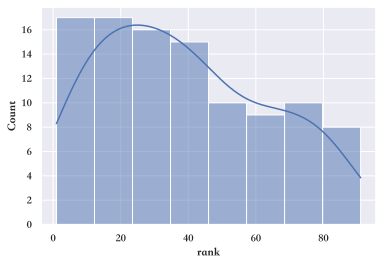

In [20]:
sns.histplot(data=df_rank, kde=True)

In [21]:
rank_interval = [(0, 3), (3, 10), (10, 20), (20, 100)]
bins = pd.IntervalIndex.from_tuples(rank_interval)

counts = (
    df_rank.to_frame()
    .assign(
        rank_interval = df["rank"].pipe(pd.cut, bins=bins)
    )
)
counts.head()

,rank,rank_interval
126,35,"(20, 100]"
128,70,"(20, 100]"
129,57,"(20, 100]"
132,81,"(20, 100]"
135,46,"(20, 100]"


In [22]:
rank_interval_freq = counts.value_counts("rank_interval", ascending=True)
rank_interval_freq.head()

rank_interval
(0, 3]        5
(3, 10]       8
(10, 20]     16
(20, 100]    73
dtype: int64

[Text(0, 0, '5'), Text(0, 0, '8'), Text(0, 0, '16'), Text(0, 0, '73')]

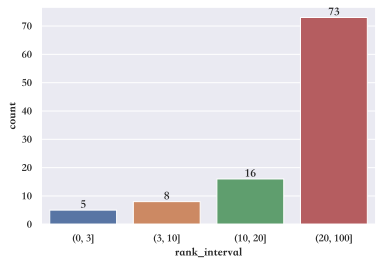

In [23]:
ax = sns.countplot(x="rank_interval", data=counts)
ax.bar_label(container=ax.containers[0], labels=rank_interval_freq.values)

### 播放量

In [24]:
# the TOP5 videos by playing.

df.sort_values("play", ascending=False).head()

,bvid,mid,author,title,created,play,comment,video_review,rank,created_type,like,coin,collect,share,seconds,since_last_days
156,BV1PQ4y167xk,533459953,刘庸干净又卫生,刘庸神作，万人要求的海盗狗。,2021-10-03 12:30:36,15653236,14163,8221,79,08h-16h,439000,108000,89000,97000,33,2
135,BV1Lb4y127dj,533459953,刘庸干净又卫生,还是芦荟店的芦荟汁干净又卫生啊！,2021-09-10 08:40:58,10565366,10196,21830,46,08h-16h,327000,39000,20000,55000,132,2
128,BV15b4y1U7kV,533459953,刘庸干净又卫生,刘庸继芦荟汁后又一重磅力作，水果捞！,2021-09-03 05:19:21,10029294,9371,33730,70,00h-07h,277000,40000,20000,106000,123,1
251,BV1AY41187b3,533459953,刘庸干净又卫生,久等了，昏昏沉沉好几天，今天清醒多了。,2022-01-25 05:00:05,8986409,35247,82150,1,00h-07h,1124000,350000,65000,48000,257,5
129,BV1W44y187z5,533459953,刘庸干净又卫生,好久没来吃这玩意，这次我得休息几天？,2021-09-04 05:57:32,8674471,6814,12417,57,00h-07h,258000,29000,11000,25000,152,2


In [25]:
df.sort_values(ops, ascending=False).head()

,bvid,mid,author,title,created,play,comment,video_review,rank,created_type,like,coin,collect,share,seconds,since_last_days
251,BV1AY41187b3,533459953,刘庸干净又卫生,久等了，昏昏沉沉好几天，今天清醒多了。,2022-01-25 05:00:05,8986409,35247,82150,1,00h-07h,1124000,350000,65000,48000,257,5
252,BV16F411H7gW,533459953,刘庸干净又卫生,历时8天，我康复了，谢谢所有的朋友们。,2022-01-30 04:58:33,7348868,30466,66680,1,00h-07h,1011000,289000,60000,62000,105,5
253,BV1vF411H7ZG,533459953,刘庸干净又卫生,除夕在印度买牛肉做大餐。,2022-01-31 08:08:27,5668822,12304,37290,6,08h-16h,576000,84000,25000,11000,213,2
164,BV1oL41137tf,533459953,刘庸干净又卫生,第二部5+5=9,2021-10-11 06:07:06,5234232,8771,5686,5,00h-07h,491000,79000,40000,16000,70,2
249,BV1qS4y1o7Yk,533459953,刘庸干净又卫生,快过年了，提前吃点好吃的。,2022-01-19 11:00:18,6794331,14981,25761,3,08h-16h,481000,49000,20000,16000,164,2


/var/folders/0t/s0c95rbs6ds7w_b0d471p0kc0000gn/T/ipykernel_28099/4026550712.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df["title"].str.replace(r"[！，。!.,]", "\n")


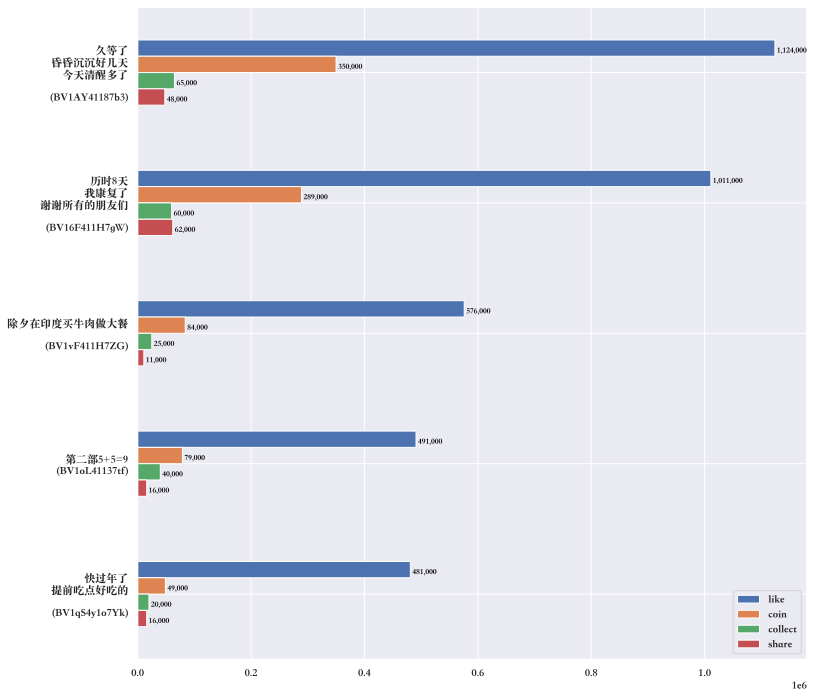

In [26]:
ax = (
    df.loc[:, ["bvid", "title", *ops]]
    .assign(
        title=(
            df["title"].str.replace(r"[！，。!.,]", "\n")
            + df["bvid"].map(lambda v: "\n({})".format(v))
        )
    )
    .sort_values(ops, ascending=False)
    .head(5)
    .set_index("title")
    .plot.barh(
        figsize=(12, 12),
        xlabel="",
    )
)

# Revert display rank.
ax.invert_yaxis()

# Annotation
for patch in ax.patches:
    ax.text(
        patch.get_width() + 0.3,
        patch.get_y() + 0.1,
        " {:,}".format(patch.get_width()),
        fontsize=8,
        color="black",
    )


In [27]:
# the top 5 video sorted by danmu and comment.

df.sort_values(["video_review", "comment"], ascending=False).head()

,bvid,mid,author,title,created,play,comment,video_review,rank,created_type,like,coin,collect,share,seconds,since_last_days
251,BV1AY41187b3,533459953,刘庸干净又卫生,久等了，昏昏沉沉好几天，今天清醒多了。,2022-01-25 05:00:05,8986409,35247,82150,1,00h-07h,1124000,350000,65000,48000,257,5
252,BV16F411H7gW,533459953,刘庸干净又卫生,历时8天，我康复了，谢谢所有的朋友们。,2022-01-30 04:58:33,7348868,30466,66680,1,00h-07h,1011000,289000,60000,62000,105,5
197,BV18r4y1Q7sE,533459953,刘庸干净又卫生,应广发粉丝的要求，印度晚上街头走一走，闲聊几句！,2021-11-24 03:00:04,4162761,14103,38706,3,00h-07h,285000,108000,27000,18000,908,1
253,BV1vF411H7ZG,533459953,刘庸干净又卫生,除夕在印度买牛肉做大餐。,2022-01-31 08:08:27,5668822,12304,37290,6,08h-16h,576000,84000,25000,11000,213,2
128,BV15b4y1U7kV,533459953,刘庸干净又卫生,刘庸继芦荟汁后又一重磅力作，水果捞！,2021-09-03 05:19:21,10029294,9371,33730,70,00h-07h,277000,40000,20000,106000,123,1


/var/folders/0t/s0c95rbs6ds7w_b0d471p0kc0000gn/T/ipykernel_28099/2088714316.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_xticklabels([f"{int(n) / 1000:,.0f} K" for n in g.ax.get_xticks()])
/var/folders/0t/s0c95rbs6ds7w_b0d471p0kc0000gn/T/ipykernel_28099/2088714316.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_yticklabels([f"{n:,.0f}" for n in g.ax.get_yticks()])


[Text(0, -20000.0, '-20,000'),
 Text(0, 0.0, '0'),
 Text(0, 20000.0, '20,000'),
 Text(0, 40000.0, '40,000'),
 Text(0, 60000.0, '60,000'),
 Text(0, 80000.0, '80,000'),
 Text(0, 100000.0, '100,000')]

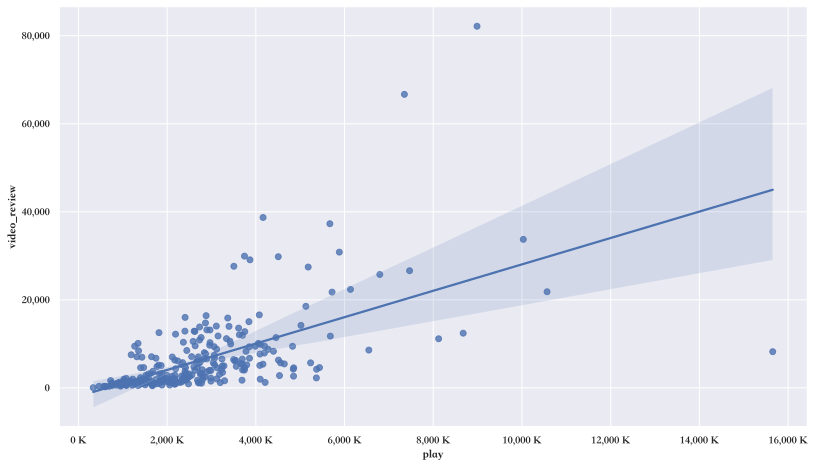

In [28]:
g = sns.lmplot(x="play", y="video_review", data=df, height=3)

g.fig.set_size_inches(16, 8)
g.ax.set_xticklabels([f"{int(n) / 1000:,.0f} K" for n in g.ax.get_xticks()])
g.ax.set_yticklabels([f"{n:,.0f}" for n in g.ax.get_yticks()])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

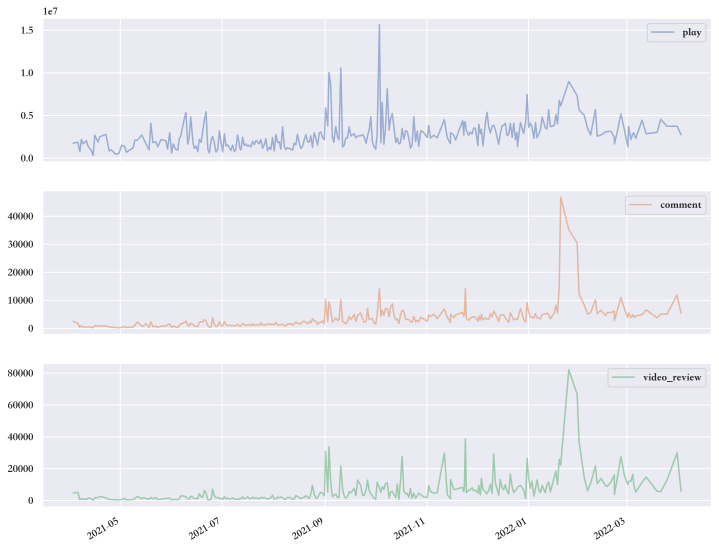

In [29]:
(
    df.loc[:, "created":"video_review"]
    .set_index("created")
    .plot.line(
    figsize=(12, 10),
    alpha=0.5,
    x_compat=True,
    xlabel="",
    subplots=True,
    )
)

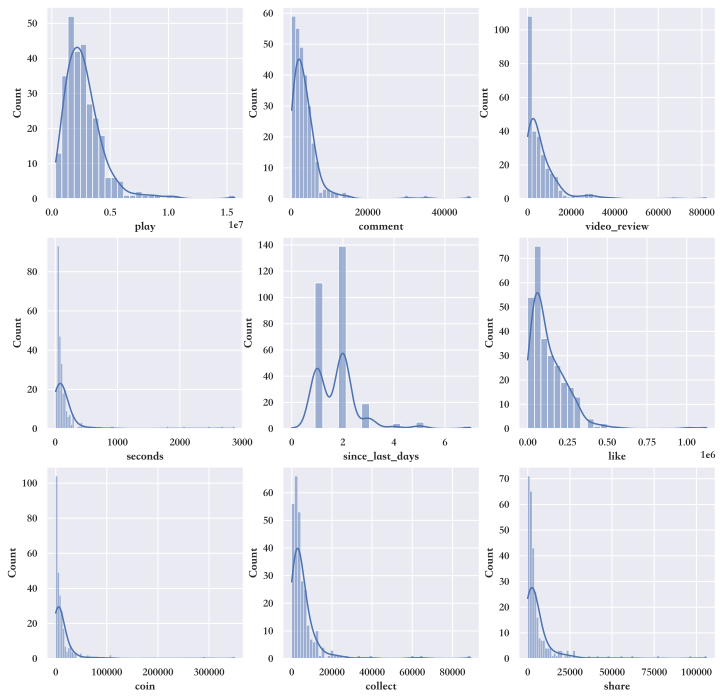

In [30]:
import itertools

fig, ax = plt.subplots(3, 3, figsize=(12, 12))

targets = [
    "play", "comment", "video_review", "seconds", "since_last_days",
    *ops,
]

# combination like: (0, 0), (0, 1), (1, 0), (1, 1) etc.
locations = itertools.product(range(ax.shape[0]), range(ax.shape[1]))

for i, j in locations:
    position = i * 3 + j
    sns.histplot(
        x=df.filter(items=targets).iloc[:, position],
        ax=ax[i][j],
        kde=True,
        alpha=0.5,
        palette="crest",
    )



### 播放时长相关

In [31]:
df.sort_values(["seconds"], ascending=False).head(10)

,bvid,mid,author,title,created,play,comment,video_review,rank,created_type,like,coin,collect,share,seconds,since_last_days
136,BV1gg411c7AD,533459953,刘庸干净又卫生,乔治理发超长版，乔治买了新手机。,2021-09-11 10:14:39,1317949,2412,7054,0,08h-16h,80000,36000,11000,2041,2877,2
118,BV1fQ4y1Y7Nt,533459953,刘庸干净又卫生,乔治理发超长版，满足一些粉丝的要求。,2021-08-24 08:18:14,1267113,3415,9467,0,08h-16h,75000,29000,12000,2801,2678,2
148,BV1FM4y137pf,533459953,刘庸干净又卫生,终于可以睡个好觉了，失眠患者的福音，半个月一次的乔治理发又来了。,2021-09-25 13:11:59,1747505,2502,6738,0,08h-16h,71000,13000,7555,2157,2470,2
175,BV1Uv411M7s8,533459953,刘庸干净又卫生,失眠患者的福音，沉浸式体验，乔治理发超长版！,2021-10-22 03:40:11,1188746,2349,7519,0,00h-07h,62000,11000,6489,1887,2056,1
270,BV1WL4y1371r,533459953,刘庸干净又卫生,印度按摩完整版,2022-03-03 12:21:58,2189504,3863,12196,0,08h-16h,117000,14000,15000,5957,1807,2
204,BV1FL4y1W74f,533459953,刘庸干净又卫生,德里街头日常刮胡子,2021-12-01 16:18:56,1471000,2577,4616,0,08h-16h,75000,4515,3569,990,922,2
197,BV18r4y1Q7sE,533459953,刘庸干净又卫生,应广发粉丝的要求，印度晚上街头走一走，闲聊几句！,2021-11-24 03:00:04,4162761,14103,38706,3,00h-07h,285000,108000,27000,18000,908,1
207,BV1pR4y1s7j2,533459953,刘庸干净又卫生,清真餐厅吃羊肉随拍。,2021-12-03 17:43:08,3394668,4983,13973,63,17h-23h,160000,18000,5713,2751,706,1
169,BV1oq4y1V7KC,533459953,刘庸干净又卫生,进来一起互相陪伴吃个饭吧，一顿真实而普通的家常便饭。顺便聊个天。,2021-10-16 04:05:05,1816158,4793,12540,0,00h-07h,121000,23000,4337,1417,642,1
238,BV1UR4y1u754,533459953,刘庸干净又卫生,分享日常早餐,2022-01-06 03:00:16,2400879,3782,12881,0,00h-07h,130000,12000,3398,1472,603,1


In [32]:
df["seconds"].map(lambda v: v <= 1000 or False).value_counts()

True     276
False      5
Name: seconds, dtype: int64

In [33]:
df.query("seconds <= 1000").sort_values(["seconds"], ascending=False).head()

,bvid,mid,author,title,created,play,comment,video_review,rank,created_type,like,coin,collect,share,seconds,since_last_days
204,BV1FL4y1W74f,533459953,刘庸干净又卫生,德里街头日常刮胡子,2021-12-01 16:18:56,1471000,2577,4616,0,08h-16h,75000,4515,3569,990,922,2
197,BV18r4y1Q7sE,533459953,刘庸干净又卫生,应广发粉丝的要求，印度晚上街头走一走，闲聊几句！,2021-11-24 03:00:04,4162761,14103,38706,3,00h-07h,285000,108000,27000,18000,908,1
207,BV1pR4y1s7j2,533459953,刘庸干净又卫生,清真餐厅吃羊肉随拍。,2021-12-03 17:43:08,3394668,4983,13973,63,17h-23h,160000,18000,5713,2751,706,1
169,BV1oq4y1V7KC,533459953,刘庸干净又卫生,进来一起互相陪伴吃个饭吧，一顿真实而普通的家常便饭。顺便聊个天。,2021-10-16 04:05:05,1816158,4793,12540,0,00h-07h,121000,23000,4337,1417,642,1
238,BV1UR4y1u754,533459953,刘庸干净又卫生,分享日常早餐,2022-01-06 03:00:16,2400879,3782,12881,0,00h-07h,130000,12000,3398,1472,603,1


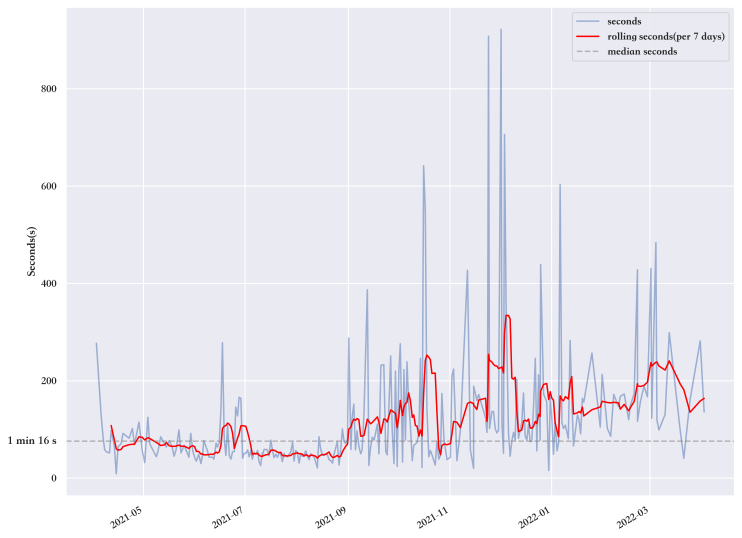

In [34]:
import math

import matplotlib.transforms as transforms

base = (
    df.filter(items=["created", "seconds"])
    .query("seconds <= 1000")
    .set_index("created")
)

ax = base.plot.line(
    figsize=(12, 10),
    x_compat=True,
    alpha=0.5,
    xlabel="",
    ylabel="Seconds(s)",
)


(
    base.rolling(7)
    .mean()
    .rename({"seconds": "rolling seconds(per 7 days)"}, axis=1)
    .plot.line(ax=ax, color="red", xlabel="")
)

# reference: https://stackoverflow.com/a/42879040
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData
)

seconds_mean = df["seconds"].median().round(2)
ax.axhline(y=seconds_mean, linestyle="--", alpha=0.5, label="median seconds", color="grey")
ax.text(
    x=0,
    y=seconds_mean,
    s=f"{int(seconds_mean / 60)} min {math.ceil(seconds_mean % 60)} s",
    ha="right",
    va="center",
    transform=trans,
)
ax.legend()


In [35]:
df.groupby("created_type")["bvid"].count()

created_type
08h-16h    148
17h-23h      9
00h-07h    124
Name: bvid, dtype: int64

<AxesSubplot:>

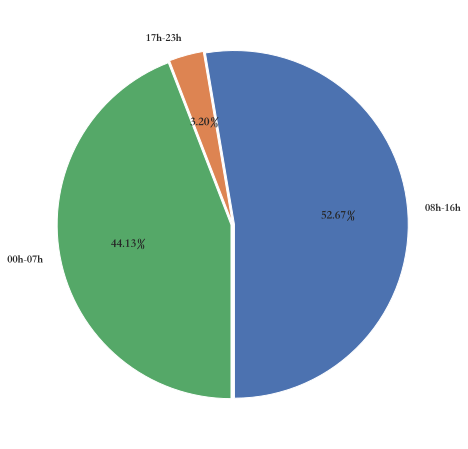

In [36]:
df.groupby("created_type")["bvid"].count().plot.pie(
    autopct="%1.2f%%",
    figsize=(8, 8),
    ylabel="",
    startangle=270,
    explode=[0.01]*3,
)


In [37]:
targets = ["created_type", "play", "comment", "video_review", "like", "coin"]
df[targets].corr()

,play,comment,video_review,like,coin
play,1.000000,0.628384,0.593064,0.735980,0.520579
comment,0.628384,1.000000,0.805082,0.788206,0.743240
video_review,0.593064,0.805082,1.000000,0.826462,0.825229
like,0.735980,0.788206,0.826462,1.000000,0.813151
coin,0.520579,0.743240,0.825229,0.813151,1.000000


In [38]:
# Z-score
normalize = lambda col: (col - col.mean()) / col.std()

normalized_df = (
    df[targets]
    .set_index("created_type")
    .transform(normalize)
    .reset_index()
)
normalized_df.head()

,created_type,play,comment,video_review,like,coin
0,17h-23h,-0.568741,-0.230981,-0.176250,-0.542814,-0.228629
1,08h-16h,-0.514461,-0.405239,-0.147394,-0.503831,0.086866
2,17h-23h,-1.143517,-0.743545,-0.658011,-0.924849,-0.416775
3,08h-16h,-0.329151,-0.605591,-0.603681,-0.636374,-0.239813
4,08h-16h,-0.618518,-0.711326,-0.610557,-0.722137,-0.390343


/Users/Bobot/pyenvs/pandas-startup/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


/Users/Bobot/pyenvs/pandas-startup/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/Bobot/pyenvs/pandas-startup/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


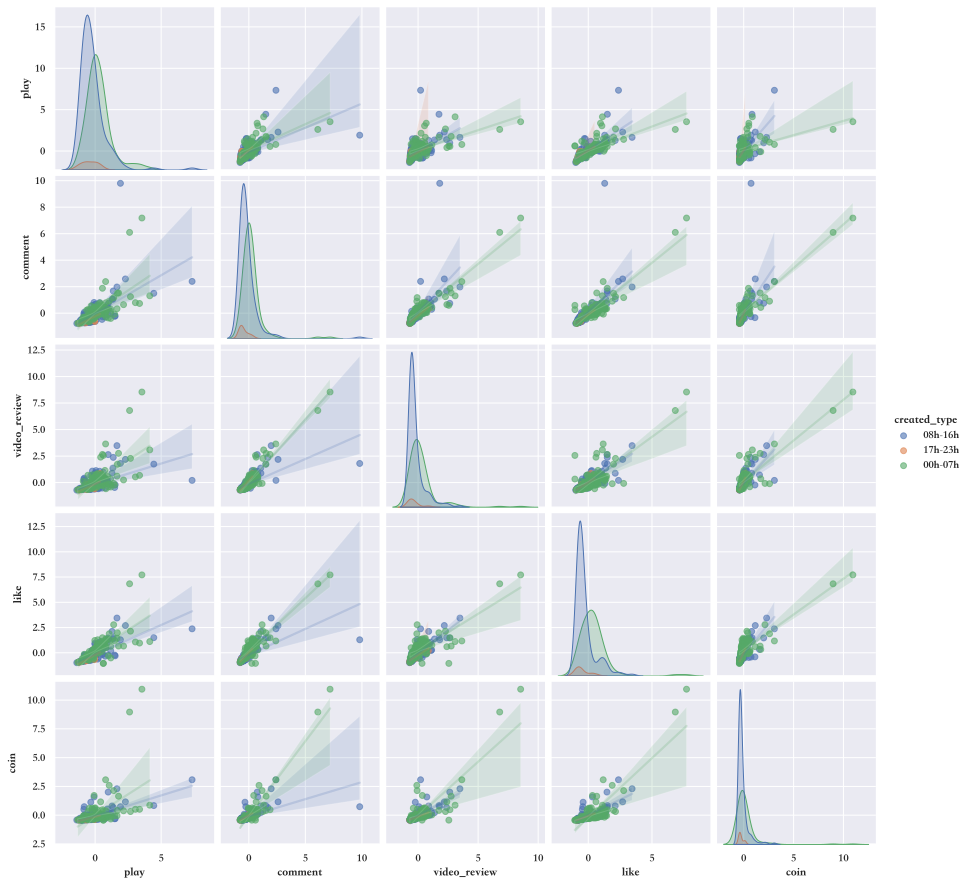

In [39]:

sns.pairplot(
    data=normalized_df,
    hue="created_type",
    kind="reg",
    plot_kws={
        "line_kws": {"alpha": 0.2},
        "scatter_kws": {"alpha": 0.6},
    }
)



In [40]:
import jieba
import jieba.analyse as ja

jieba.add_word("干净又卫生", tag="n")
jieba.add_word("芦荟汁", tag="n")

title = "\n".join(df["title"].tolist())
keywords = ja.extract_tags(
    title,
    topK=100,
    withWeight=True,
    allowPOS=("nr", "v", "n", "ns", "vn"),
)
keywords[:10]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/0t/s0c95rbs6ds7w_b0d471p0kc0000gn/T/jieba.cache
Loading model cost 0.599 seconds.
Prefix dict has been built successfully.


[('印度', 0.683859592143686),
 ('干净又卫生', 0.3195038085407572),
 ('甘蔗汁', 0.15681817260167039),
 ('芦荟汁', 0.14256197509242763),
 ('乔治', 0.12482552216675946),
 ('理发', 0.11240551405567928),
 ('刨冰', 0.09979338256469934),
 ('早餐', 0.08616520567403119),
 ('味道', 0.07351749903948775),
 ('小吃', 0.07328070809749444)]

In [41]:
from pyecharts import options as opts
from pyecharts.charts import WordCloud

In [42]:
graphics = (
    WordCloud(
        init_opts=opts.InitOpts(
            height="800px",
            width="1000px",
            bg_color="white",
        )
    )
    .add("", keywords, word_size_range=[25, 80])
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="视频标题关键词 TOP 100",
            subtitle="UP 主：刘庸干净又卫生",
            pos_left="center",
        ),
        toolbox_opts=opts.ToolboxOpts(
            is_show=True,
            pos_left="center",
            pos_top="8%",
            feature=opts.ToolBoxFeatureOpts(
                opts.ToolBoxFeatureSaveAsImageOpts(
                    pixel_ratio=5,
                    background_color="#ffffff",
                )
            )
        ),
    )
)

In [44]:
graphics.render_notebook()